In [10]:
from metal.layers.dense import Dense
from metal.layers.conv2D import Conv2D
from metal.layers.flatten import Flatten
from metal.losses.loss import CrossEntropy
from metal.losses.loss_functions import CrossEntropy as cp

from metal.initializers.optimizer_init import OptimizerInitializer, Adam
from metal.initializers.scheduler_init import SchedulerInitializer
from metal.layers.pooling import Pool2D
import numpy as np


In [11]:
imgs = np.load('../../../downloads/catdog.npy',allow_pickle=True)
labels = np.load('../../../downloads/catdoglabels.npy',allow_pickle=True)

In [12]:
X = imgs
y = labels

In [14]:
c1 = Conv2D(1,(5,5),'same',stride=1,optimizer=Adam(),act_fn='relu')
#p1 = Pool2D((2,2),pad='same',optimizer=Adam())
c2 = Conv2D(1,(5,5),'same',stride=1,optimizer=Adam(),act_fn='relu')
f1 = Flatten(optimizer=Adam())
d1 = Dense(1,optimizer=Adam(),act_fn='sigmoid')
l1 = CrossEntropy()
l2 = cp()
c1=c1(optimizer=Adam())
c1.hyperparameters

{'layer': 'Conv2D',
 'pad': 'same',
 'init': 'glorot_uniform',
 'in_ch': None,
 'out_ch': 1,
 'stride': 1,
 'dilation': 0,
 'act_fn': 'None',
 'kernel_shape': (5, 5),
 'optimizer': {'cache': {},
  'hyperparameters': {'id': 'Adam',
   'lr': 0.001,
   'eps': 1e-07,
   'decay1': 0.9,
   'decay2': 0.999,
   'clip_norm': None,
   'lr_scheduler': 'ConstantScheduler(lr=0.001)'}}}

In [41]:
c1.kernel_shape
c1.in_ch =3
c1._init_params()
c1.act_fn

In [42]:
def train_test_split(X, y, test_size=0.5, shuffle=True, seed=None):
    """ Split the data into train and test sets """
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    # Split the training data from test data in the ratio specified in
    # test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test

def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]


In [43]:
X_train_, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, seed = 1)


In [44]:
X_train = X_train_[0].reshape((1,224,224,3))/255.0
X_train.shape

(1, 224, 224, 3)

In [45]:
z=c1.forward(X_train)

In [10]:
p = p1.forward(z)

In [11]:
p.shape
#c2 = Conv2D(1,(5,5),'same',stride=1,optimizer=Adam(),act_fn='relu')


(1, 224, 224, 1)

In [46]:
z2=c2.forward(p)

In [47]:
f1out = f1.forward(z2)

In [48]:
f1out.shape

(1, 50176)

In [49]:
d1out = d1.forward(f1out)

In [50]:
d1out

array([[0.3953553]])

In [51]:
d1out
y = np.array([[0]])
y.shape

(1, 1)

In [52]:
l2.loss(y,d1out)

0.5031142700828599

In [53]:
z2.shape,z.shape

((1, 224, 224, 1), (1, 224, 224, 1))

In [54]:
import matplotlib.pyplot as plt


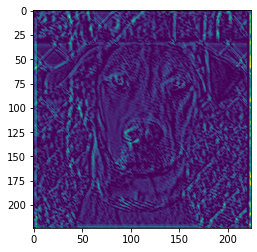

In [66]:
plt.imshow(z2.reshape( 224, 224),interpolation='lanczos')

In [56]:
l1g = l2.gradient(y,d1out)

In [57]:
d1g = d1.backward(l1g)

In [58]:
f1g = f1.backward(d1g)

In [59]:
c1g = c2.backward(f1g)

In [26]:
p1g = p1.backward(c1g)

In [60]:
c1g.shape

(1, 224, 224, 1)

In [61]:
c1g_ = c1.backward(p1g)

In [62]:
c1g.shape

(1, 224, 224, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


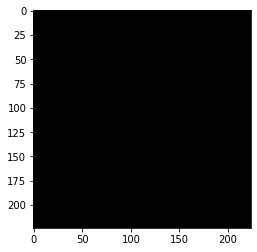

In [65]:
plt.imshow(c1g_.reshape(224, 224,3),interpolation='lanczos')

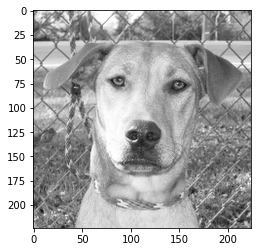

In [145]:
plt.imshow(X_train_[0],interpolation='lanczos')

In [108]:
from metal.initializers.optimizer_init import OptimizerInitializer, Adam
import numpy as np

In [2]:
adam = OptimizerInitializer('adam')()
actoutrelu_ = np.array([[1.62434536, 0.,         0.        ],
                        [0.,         0.86540763, 0.        ]])

actaffine_ = np.array([[ 1.62434536, -0.61175641, -0.52817175],
                        [-1.07296862,  0.86540763, -2.3015387 ]])
print(adam)

Adam(lr=0.001, decay1=0.9, decay2=0.999, eps=1e-07, clip_norm=None, lr_scheduler=ConstantScheduler(lr=0.001))


In [3]:
adout=adam.update(actaffine_,actoutrelu_,'p1')

In [4]:
print(adam)

Adam(lr=0.001, decay1=0.9, decay2=0.999, eps=1e-07, clip_norm=None, lr_scheduler=ConstantScheduler(lr=0.001))


In [5]:
adout

array([[ 1.62334536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86440763, -2.3015387 ]])

In [36]:
from metal.optimizers.optimizer import OptimizerBase, Adam
from metal.initializers.activation_init import ActivationInitializer


In [37]:
adam = Adam(lr=1e-5)
adam.hyperparameters

{'id': 'Adam',
 'lr': 1e-05,
 'eps': 1e-07,
 'decay1': 0.9,
 'decay2': 0.999,
 'clip_norm': None,
 'lr_scheduler': 'ConstantScheduler(lr=1e-05)'}

In [8]:
#adam.update(actaffine_,actoutrelu_,'p1')

In [9]:
dic = OptimizerInitializer({'hyperparameters':{'id':'Adam',
                                              'lr':10}})

In [10]:
op2 = dic()

In [11]:
dic.param['hyperparameters']

{'id': 'Adam', 'lr': 10}

In [13]:
op2.hyperparameters

{'id': 'Adam',
 'lr': 10,
 'eps': 1e-07,
 'decay1': 0.9,
 'decay2': 0.999,
 'clip_norm': None,
 'lr_scheduler': 'ConstantScheduler(lr=0.001)'}

In [17]:
ActivationInitializer(None)()

In [32]:
from metal.initializers.weight_init import WeightInitializer


In [34]:
WeightInitializer('<metal.activations.activation.Affine at 0x7f0612c9c590>')

In [35]:
from copy import deepcopy

In [38]:
ac = deepcopy(adam)

In [41]:
ac == adam

False

In [42]:
id(adam)

139663400460816

In [43]:
id(ac)

139663400462928

In [44]:
ac.hyperparameters

{'id': 'Adam',
 'lr': 1e-05,
 'eps': 1e-07,
 'decay1': 0.9,
 'decay2': 0.999,
 'clip_norm': None,
 'lr_scheduler': 'ConstantScheduler(lr=1e-05)'}

In [30]:
np.arange(4)

array([0, 1, 2, 3])

In [34]:
 np.random.uniform(-5, 5, size=(2,2))

array([[-1.87318844, -4.44301587],
       [-2.06137515, -1.43983514]])

In [71]:
cs = SchedulerInitializer(lr=.009)()


In [72]:
cs.lr

0.009

In [73]:
cs.hyperparameters

{'id': 'ConstantScheduler', 'lr': 0.009}

In [74]:
cs.learning_rate()

0.009

In [32]:
from metal.nn.neuralnetwork import NeuralNetwork

In [34]:
nn=NeuralNetwork(Adam(),None,None)

In [35]:
nn.add(c1)

In [22]:
np.random.seed(None)
def random_one_hot_matrix(n_examples, n_classes):
    """Create a random one-hot matrix of shape (`n_examples`, `n_classes`)"""
    X = np.eye(n_classes)
    X = X[np.random.choice(n_classes, n_examples)]
    return X


In [58]:
n_classes = np.random.randint(2, 100)
n_examples = np.random.randint(1, 1000)
y = y_pred = random_one_hot_matrix(n_examples, n_classes)

In [59]:
y.shape

(900, 69)

In [60]:
l1.loss(y,y_pred)

-1.9984014443252815e-13

In [53]:
np.sum(d1out, axis=1)

array([0.36516065])

In [54]:
np.array(d1out).shape

(1, 1)

In [57]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

28

In [66]:
eps = np.finfo(float).eps


In [68]:
0+eps

2.220446049250313e-16

In [75]:
p = np.clip(y.astype('float32'), 1e-20, 1 - 1e-20)


In [76]:
p

array([[1.e-20]], dtype=float32)

In [77]:
y

array([[0]])